# NN 다중분류
- 펭귄데이터 셋

In [ ]:
!pip install --q ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 7.14 s (started: 2024-06-28 06:21:40 +00:00)


In [ ]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras

time: 599 µs (started: 2024-06-28 06:21:47 +00:00)


## 1.데이터 준비

In [ ]:
!wget https://raw.githubusercontent.com/devdio/flyai_datasets/main/penguins.csv

--2024-06-28 06:21:47--  https://raw.githubusercontent.com/devdio/flyai_datasets/main/penguins.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13523 (13K) [text/plain]
Saving to: ‘penguins.csv’

penguins.csv        100%[===================>]  13.21K  --.-KB/s    in 0s      

2024-06-28 06:21:47 (50.5 MB/s) - ‘penguins.csv’ saved [13523/13523]

time: 211 ms (started: 2024-06-28 06:21:47 +00:00)


In [ ]:
penguins = pd.read_csv('/content/penguins.csv')
penguins.shape

(344, 7)

time: 25.1 ms (started: 2024-06-28 06:21:48 +00:00)


In [ ]:
df = penguins.copy()
df.head()

,Species,Island,Culmen Length(mm),Culmen Depth(mm),Flipper Length(mm),Body Mass(g),Sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


time: 55.9 ms (started: 2024-06-28 06:21:48 +00:00)


In [ ]:
# 컬럼 처리
df.columns = [col.lower().replace(' ', '_').replace('(', '_').replace(')', '')    for col in df.columns]
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


time: 41.4 ms (started: 2024-06-28 06:21:48 +00:00)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
time: 36.3 ms (started: 2024-06-28 06:21:48 +00:00)


In [ ]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

time: 7.86 ms (started: 2024-06-28 06:21:48 +00:00)


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
culmen_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


time: 61.6 ms (started: 2024-06-28 06:21:48 +00:00)


### 범주형 변수

In [ ]:
cols_cat = df.select_dtypes(include=['object'])
cols_cat

,species,island,sex
0,Adelie,Torgersen,MALE
1,Adelie,Torgersen,FEMALE
2,Adelie,Torgersen,FEMALE
3,Adelie,Torgersen,NaN
4,Adelie,Torgersen,FEMALE
...,...,...,...
339,Gentoo,Biscoe,NaN
340,Gentoo,Biscoe,FEMALE
341,Gentoo,Biscoe,MALE
342,Gentoo,Biscoe,FEMALE


time: 54.6 ms (started: 2024-06-28 06:21:48 +00:00)


In [ ]:
cols_cat['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

time: 9.97 ms (started: 2024-06-28 06:21:48 +00:00)


In [ ]:
cols_cat['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

time: 13.5 ms (started: 2024-06-28 06:21:48 +00:00)


In [ ]:
cols_cat['sex'].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

time: 11.6 ms (started: 2024-06-28 06:21:48 +00:00)


In [ ]:
#
cols_cat.loc[cols_cat['sex']=='.', 'sex'] = 'FEMALE'
cols_cat['sex'].value_counts()

sex
MALE      168
FEMALE    166
Name: count, dtype: int64

time: 14.7 ms (started: 2024-06-28 06:21:48 +00:00)


In [ ]:
df.loc[cols_cat['sex']=='.', 'sex'] = 'FEMALE'
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

time: 10.9 ms (started: 2024-06-28 06:21:48 +00:00)


In [ ]:
df.groupby('island')['species'].value_counts()

island     species  
Biscoe     Gentoo       124
           Adelie        44
Dream      Chinstrap     68
           Adelie        56
Torgersen  Adelie        52
Name: count, dtype: int64

time: 15.8 ms (started: 2024-06-28 06:21:48 +00:00)


### 연속형변수

In [ ]:
cols_num = df.select_dtypes(include=['number'])
cols_num

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0
...,...,...,...,...
339,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


time: 46.2 ms (started: 2024-06-28 06:21:48 +00:00)


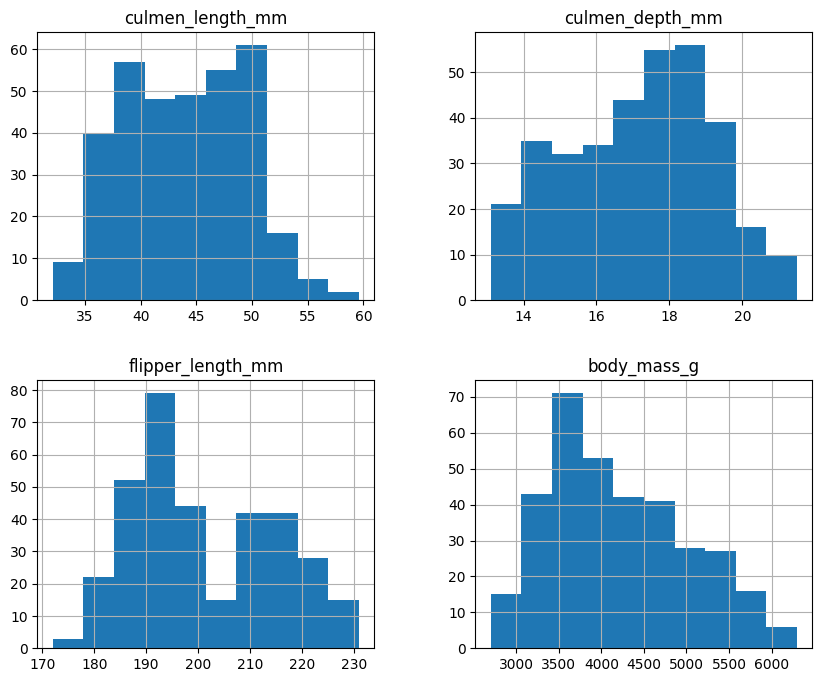

time: 2.14 s (started: 2024-06-28 06:21:48 +00:00)


In [ ]:
cols_num.hist(figsize=(10, 8))
plt.show()

### 이상치

In [ ]:
cols_num.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g'],
      dtype='object')

time: 18 ms (started: 2024-06-28 06:21:50 +00:00)


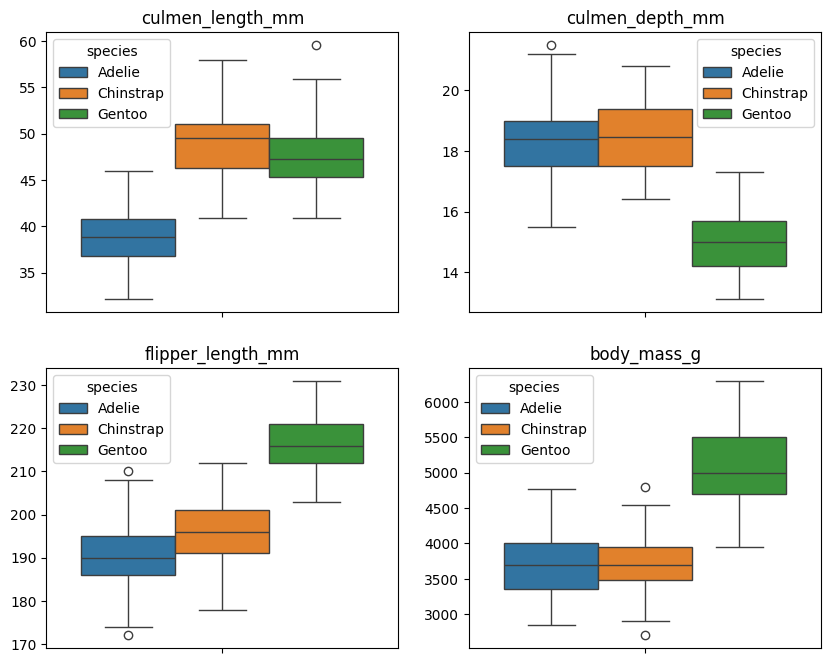

time: 4.52 s (started: 2024-06-28 06:21:50 +00:00)


In [ ]:
# 박스플롯
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate(cols_num.columns):
    sns.boxplot(y=col, data=cols_num, hue=df['species'], ax=axes[i])
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)
    axes[i].set_title(col)

In [ ]:
# 데이터 분리
# 결측치
# 인코딩
# 학습

time: 392 µs (started: 2024-06-28 06:21:55 +00:00)


## 2.트레인, 테스트 분리

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['species'])

train.shape, test.shape

((275, 7), (69, 7))

time: 342 ms (started: 2024-06-28 06:21:55 +00:00)


### 결측치처리

In [ ]:
train.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

time: 6.8 ms (started: 2024-06-28 06:21:55 +00:00)


<Axes: >

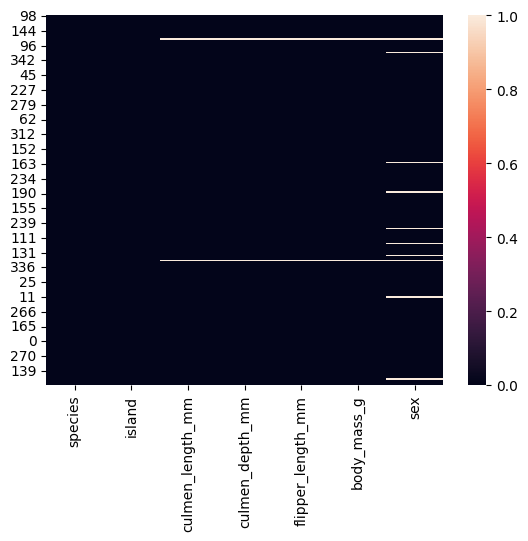

time: 1.02 s (started: 2024-06-28 06:21:55 +00:00)


In [ ]:
sns.heatmap(train.isna())

In [ ]:
train = train.dropna()

time: 2.15 ms (started: 2024-06-28 06:21:56 +00:00)


### X, y 분리

In [ ]:
X_train = train.drop('species', axis=1)
y_train = train['species']

X_train.shape, y_train.shape

((265, 6), (265,))

time: 9.11 ms (started: 2024-06-28 06:21:56 +00:00)


In [ ]:
X_train.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
98,Dream,33.1,16.1,178.0,2900.0,FEMALE
114,Biscoe,39.6,20.7,191.0,3900.0,FEMALE
118,Torgersen,35.7,17.0,189.0,3350.0,FEMALE
303,Biscoe,50.0,15.9,224.0,5350.0,MALE
343,Biscoe,49.9,16.1,213.0,5400.0,MALE


time: 34.8 ms (started: 2024-06-28 06:21:56 +00:00)


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

X_train[['island', 'sex']] = oe.fit_transform(X_train[['island', 'sex']])
X_train.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
98,1.0,33.1,16.1,178.0,2900.0,1.0
114,0.0,39.6,20.7,191.0,3900.0,1.0
118,2.0,35.7,17.0,189.0,3350.0,1.0
303,0.0,50.0,15.9,224.0,5350.0,2.0
343,0.0,49.9,16.1,213.0,5400.0,2.0


time: 64.8 ms (started: 2024-06-28 06:21:57 +00:00)


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_e = le.fit_transform(y_train)
y_train_e


array([0, 0, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       0, 2, 0, 0, 2, 0, 1, 1, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2,
       0, 0, 1, 2, 0, 1, 0, 2, 2, 2, 1, 0, 0, 1, 0, 2, 2, 0, 0, 1, 2, 0,
       0, 0, 1, 2, 1, 0, 2, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0,
       1, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 2, 2, 1, 1, 0, 1,
       0, 1, 1, 2, 0, 0, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 1, 0, 0, 0, 0, 2, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1, 2,
       0, 1, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 0, 1, 2, 0, 1, 0, 1, 2, 2, 2, 2,
       1, 1, 1, 2, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 1, 0, 1,
       2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 1, 2, 1, 0, 2, 0, 0,
       1])

time: 22.6 ms (started: 2024-06-28 06:21:57 +00:00)


### 스케일링

In [ ]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
X_train_s = rs.fit_transform(X_train)
X_train_s

array([[ 0.        , -1.31868132, -0.375     , -0.82608696, -0.92      ,
        -1.        ],
       [-1.        , -0.6043956 ,  1.0625    , -0.26086957, -0.12      ,
        -1.        ],
       [ 1.        , -1.03296703, -0.09375   , -0.34782609, -0.56      ,
        -1.        ],
       ...,
       [ 1.        , -0.25274725,  0.375     , -0.08695652,  0.16      ,
         0.        ],
       [ 1.        , -0.92307692,  0.46875   , -0.43478261, -0.2       ,
        -1.        ],
       [ 0.        ,  0.62637363,  0.53125   ,  0.56521739,  0.04      ,
         0.        ]])

time: 55.2 ms (started: 2024-06-28 06:21:57 +00:00)


## 3.모델 학습

In [ ]:
from keras.utils import to_categorical

y_train_o = to_categorical(y_train_e)
y_train_o

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0

time: 26.8 ms (started: 2024-06-28 06:41:51 +00:00)


In [ ]:
print(X_train_s.shape, y_train_o.shape)
print(type(X_train_s), type(y_train_o))


(265, 6) (265, 3)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
time: 2.97 ms (started: 2024-06-28 06:42:27 +00:00)


In [ ]:
X_train_s.shape

(265, 6)

time: 4.56 ms (started: 2024-06-28 06:42:47 +00:00)


In [ ]:
from keras import layers

model = keras.Sequential([
    layers.Dense(units=16, activation='relu', input_shape=(6,)),
    layers.Dense(units=8, activation='relu'),
    layers.Dense(units=3, activation='softmax'),
])

time: 325 ms (started: 2024-06-28 06:42:55 +00:00)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                112       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 275 (1.07 KB)
Trainable params: 275 (1.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
time: 63.1 ms (started: 2024-06-28 06:43:02 +00:00)


In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

time: 32.9 ms (started: 2024-06-28 06:44:30 +00:00)


In [ ]:
EPOCHS = 100
BATCH_SIZE = 16

history = model.fit(
    X_train_s, y_train_o,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2
)


Epoch 1/100
14/14 [==============================] - 2s 27ms/step - loss: 1.0984 - accuracy: 0.2736 - val_loss: 1.0824 - val_accuracy: 0.3396
Epoch 2/100
14/14 [==============================] - 0s 6ms/step - loss: 1.0544 - accuracy: 0.4151 - val_loss: 1.0544 - val_accuracy: 0.4151
Epoch 3/100
14/14 [==============================] - 0s 7ms/step - loss: 1.0231 - accuracy: 0.5142 - val_loss: 1.0264 - val_accuracy: 0.5283
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 0.9891 - accuracy: 0.6415 - val_loss: 0.9891 - val_accuracy: 0.6792
Epoch 5/100
14/14 [==============================] - 0s 7ms/step - loss: 0.9435 - accuracy: 0.7783 - val_loss: 0.9412 - val_accuracy: 0.7358
Epoch 6/100
14/14 [==============================] - 0s 6ms/step - loss: 0.8849 - accuracy: 0.8113 - val_loss: 0.8804 - val_accuracy: 0.7358
Epoch 7/100
14/14 [==============================] - 0s 6ms/step - loss: 0.8138 - accuracy: 0.8113 - val_loss: 0.8160 - val_accuracy: 0.7358
Epoch 8/100


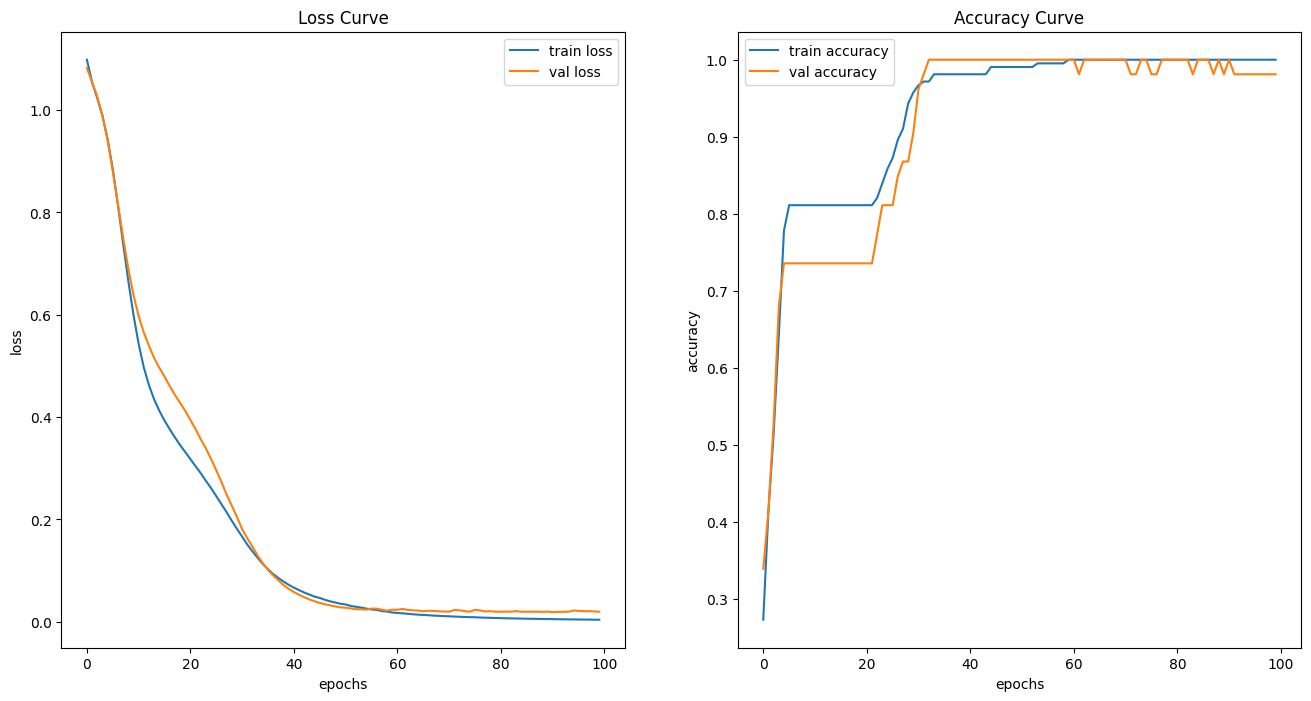

time: 1.14 s (started: 2024-06-28 06:47:31 +00:00)


In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()

plot_history(history)

In [ ]:
# 평가 확인 (테스트 데이터 전처리를 ...)

X_test_s = X_train_s.copy()
y_test_e = y_train_e.copy()

time: 1.16 ms (started: 2024-06-28 06:50:33 +00:00)


In [ ]:
y_test_e

array([0, 0, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       0, 2, 0, 0, 2, 0, 1, 1, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2,
       0, 0, 1, 2, 0, 1, 0, 2, 2, 2, 1, 0, 0, 1, 0, 2, 2, 0, 0, 1, 2, 0,
       0, 0, 1, 2, 1, 0, 2, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0,
       1, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 2, 2, 1, 1, 0, 1,
       0, 1, 1, 2, 0, 0, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 1, 0, 0, 0, 0, 2, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1, 2,
       0, 1, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 0, 1, 2, 0, 1, 0, 1, 2, 2, 2, 2,
       1, 1, 1, 2, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 1, 0, 1,
       2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 1, 2, 1, 0, 2, 0, 0,
       1])

time: 15.3 ms (started: 2024-06-28 06:52:37 +00:00)


In [ ]:
y_pred = model.predict(X_test_s)
y_pred

9/9 [==============================] - 0s 7ms/step


array([[9.99835968e-01, 1.62218203e-04, 1.93624442e-06],
       [9.99834538e-01, 1.65127887e-04, 4.52487029e-07],
       [9.99930799e-01, 6.84932675e-05, 6.35961442e-07],
       [1.37115727e-04, 4.96459892e-04, 9.99366462e-01],
       [3.01095366e-04, 8.52961559e-04, 9.98845994e-01],
       [5.29662939e-03, 7.24356389e-04, 9.93978977e-01],
       [9.94257092e-01, 5.54933771e-03, 1.93523811e-04],
       [5.71050274e-04, 8.12230399e-04, 9.98616636e-01],
       [1.42594730e-03, 9.97804165e-01, 7.69908016e-04],
       [7.42081102e-05, 5.38519758e-04, 9.99387324e-01],
       [9.99310791e-01, 6.88733708e-04, 3.51723287e-07],
       [9.67514336e-01, 3.22555155e-02, 2.30100515e-04],
       [1.03636041e-04, 1.25060743e-03, 9.98645723e-01],
       [2.48504075e-04, 4.27857216e-04, 9.99323547e-01],
       [9.99989927e-01, 9.83521204e-06, 1.08437398e-07],
       [2.67484400e-04, 2.30384627e-04, 9.99502003e-01],
       [7.39731913e-05, 2.05848264e-04, 9.99720216e-01],
       [9.99970973e-01, 2.89015

time: 453 ms (started: 2024-06-28 06:51:03 +00:00)


In [ ]:
import numpy as np

y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       0, 2, 0, 0, 2, 0, 1, 1, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2,
       0, 0, 1, 2, 0, 1, 0, 2, 2, 2, 1, 0, 0, 1, 0, 2, 2, 0, 0, 1, 2, 0,
       0, 0, 1, 2, 1, 0, 2, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0,
       1, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 2, 2, 1, 1, 0, 1,
       0, 1, 1, 2, 0, 0, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 1, 0, 0, 0, 0, 2, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1, 2,
       0, 1, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 0, 1, 2, 0, 1, 0, 1, 2, 2, 2, 2,
       1, 1, 1, 2, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 1, 0, 1,
       2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 1, 1, 2, 1, 0, 2, 0, 0,
       1])

time: 14.9 ms (started: 2024-06-28 06:55:10 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score
from sklearn.metrics import confusion_matrix

def print_metrics(y_true, y_pred, aver='binary'):
    print('accuracy:', accuracy_score(y_true, y_pred))
    print('recall:', recall_score(y_true, y_pred ,average=aver))
    print('precision:', precision_score(y_true, y_pred,average=aver))
    print('f1 :', f1_score(y_true, y_pred, average=aver))

    cfm = confusion_matrix(y_true, y_pred)
    s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)
    s.set(xlabel='Prediction', ylabel='Actual')
    plt.show()

time: 4.89 ms (started: 2024-06-28 06:55:45 +00:00)


accuracy: 0.9962264150943396
recall: 0.9971264367816092
precision: 0.993939393939394
f1 : 0.9954988945814635


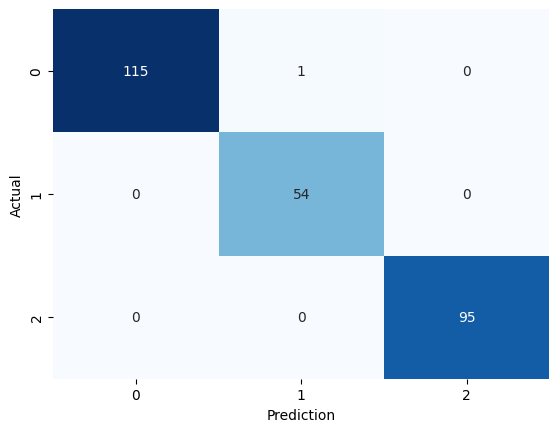

time: 711 ms (started: 2024-06-28 06:56:03 +00:00)


In [ ]:
print_metrics(y_test_e, y_pred, aver='macro')